In [19]:
import pandas as pd
import networkx as nx
import community as community_louvain  # pip install python-louvain
import matplotlib.pyplot as plt
import numpy as np
import json


In [ ]:

# Load the graph from the GraphML file
G = nx.read_graphml('attendee_co_attendance_graph.graphml')

# Print some basic information about the loaded graph
print(f"Loaded graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

# Example analysis: Calculate the degree centrality of each node
degree_centrality = nx.degree_centrality(G)

# Print the degree centrality of each node
print("Degree Centrality of Nodes:")
for node, centrality in degree_centrality.items():
    #print(f"Node {node}: {centrality:.4f}")

# # Visualize the graph
# plt.figure(figsize=(12, 8))
# pos = nx.spring_layout(G)
# nx.draw(G, pos, with_labels=True, node_size=50, font_size=10, node_color='lightblue', edge_color='gray')

# # Optionally, draw edge labels to show weights
# edge_labels = nx.get_edge_attributes(G, 'weight')
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# plt.title("Loaded Attendee Co-Attendance Graph")
# plt.show()


Loaded graph has 998 nodes and 153344 edges.
Degree Centrality of Nodes:
Node a925: 0.3621
Node a464: 0.1976
Node a769: 0.3029
Node a611: 0.2417
Node a799: 0.3581
Node a8: 0.3992
Node a616: 0.4714
Node a622: 0.3611
Node a637: 0.5236
Node a35: 0.4824
Node a936: 0.3049
Node a751: 0.1525
Node a907: 0.4343
Node a957: 0.2327
Node a846: 0.2187
Node a761: 0.3842
Node a274: 0.3811
Node a267: 0.3902
Node a508: 0.3701
Node a152: 0.4052
Node a368: 0.3541
Node a916: 0.4423
Node a448: 0.3581
Node a323: 0.3922
Node a804: 0.5567
Node a315: 0.2768
Node a986: 0.4022
Node a590: 0.2046
Node a872: 0.3240
Node a324: 0.3220
Node a756: 0.3450
Node a994: 0.4413
Node a63: 0.2558
Node a108: 0.2227
Node a384: 0.1825
Node a476: 0.2608
Node a196: 0.2578
Node a735: 0.3320
Node a836: 0.3541
Node a414: 0.5286
Node a114: 0.5075
Node a236: 0.4584
Node a950: 0.3571
Node a695: 0.3159
Node a282: 0.1655
Node a809: 0.4915
Node a151: 0.2618
Node a184: 0.2538
Node a531: 0.3470
Node a292: 0.3601
Node a860: 0.3400
Node a534: 0.

In [11]:

# # -------------------------------
# # 2. Create projected graph (Attendee-to-Attendee)
# # -------------------------------
# # First, extract all attendee nodes
# attendees = [n for n, d in G.nodes(data=True) if d.get('type') == 'Attendee']

# # Create the weighted projection graph for attendees
# P = nx.algorithms.bipartite.weighted_projected_graph(G, attendees)
# print(f"Projected graph has {P.number_of_nodes()} nodes and {P.number_of_edges()} edges.")

In [12]:


# -------------------------------
# 3. Community Detection using Louvain Method
# -------------------------------
# The best_partition function returns a dictionary mapping node -> community_id
partition = community_louvain.best_partition(G)
print("Community detection complete.")
# Example: Print the first 10 attendee-community pairs
for i, (node, community_id) in enumerate(partition.items()):
    if i >= 10:
        break
    print(f"Attendee {node} is in community {community_id}")



Community detection complete.
Attendee a925 is in community 0
Attendee a464 is in community 1
Attendee a769 is in community 1
Attendee a611 is in community 1
Attendee a799 is in community 1
Attendee a8 is in community 1
Attendee a616 is in community 7
Attendee a622 is in community 1
Attendee a637 is in community 1
Attendee a35 is in community 0


Blacklist for attendee a2: ['a925', 'a35', 'a152', 'a804', 'a236', 'a950', 'a432', 'a406', 'a552', 'a214', 'a720', 'a389', 'a928', 'a833', 'a58', 'a746', 'a254', 'a272', 'a542', 'a832', 'a666', 'a572', 'a204', 'a589', 'a576', 'a825', 'a21', 'a582', 'a606', 'a823', 'a754', 'a657', 'a773', 'a521', 'a595', 'a718', 'a545', 'a189', 'a300', 'a941', 'a541', 'a724', 'a610', 'a456', 'a586', 'a23', 'a353', 'a9', 'a281', 'a157', 'a500', 'a275', 'a791', 'a603', 'a400', 'a660', 'a409', 'a201', 'a876', 'a924', 'a105', 'a397', 'a967', 'a61', 'a445', 'a117', 'a760', 'a837', 'a835', 'a520', 'a819', 'a382', 'a663', 'a316', 'a968', 'a176', 'a440', 'a84', 'a646', 'a253', 'a398', 'a939', 'a758', 'a461', 'a314', 'a339']
Data saved as 'Community_People_ID.json'.


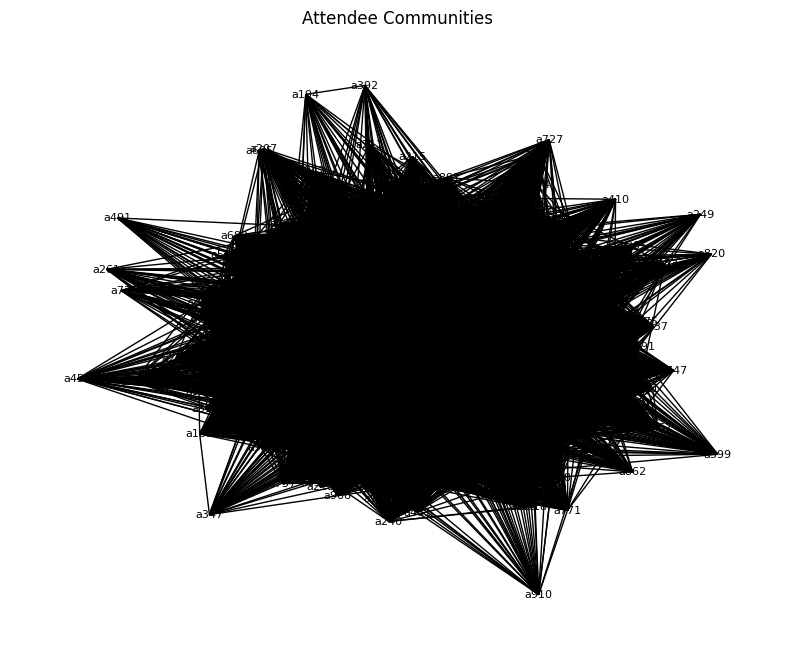

Original bipartite graph saved to 'event_attendee_graph.gexf'


In [ ]:
your_attendee_id = 'a2'  # e.g., "A123"

#  -------------------------------
# 4. Create Blacklist Function
# -------------------------------
def get_blacklist(your_id, partition):
    """
    Given your attendee id and a partition (mapping attendee -> community),
    returns a list of attendees in the same community (excluding yourself).
    """
    if your_id not in partition:
        print(f"Your attendee id {your_id} was not found in the network.")
        return []
    your_community = partition[your_id]
    blacklist = [attendee for attendee, comm in partition.items() 
                 if comm == your_community and attendee != your_id]
    return blacklist

# Replace 'your_attendee_id' with your actual attendee id

blacklist = get_blacklist(your_attendee_id, partition)
print(f"Blacklist for attendee {your_attendee_id}: {blacklist}")

# Open the file
json_file = open('Community_People_ID.json', 'w')
json.dump(blacklist, json_file, indent=4)
json_file.close()

print("Data saved as 'Community_People_ID.json'.")


# -------------------------------
# 5. Visualize Communities
# -------------------------------
# Create a spring layout for a nice visualization
pos = nx.spring_layout(G, seed=42)

# Get the set of unique communities and generate a color map
communities = set(partition.values())
colors = plt.cm.rainbow(np.linspace(0, 1, len(communities)))
community_color_map = {com: colors[i] for i, com in enumerate(communities)}

# Prepare node colors based on community membership
node_colors = [community_color_map[partition[node]] for node in P.nodes()]

# Draw the projected graph with nodes colored by community
plt.figure(figsize=(10, 8))
nx.draw_networkx(G, pos, node_color=node_colors, with_labels=True, font_size=8)
plt.title("Attendee Communities")
plt.axis("off")
plt.show()

# -------------------------------
# Optionally, save the graph to a file (GEXF format)
# -------------------------------
nx.write_gexf(G, "event_attendee_graph.gexf")
print("Original bipartite graph saved to 'event_attendee_graph.gexf'")


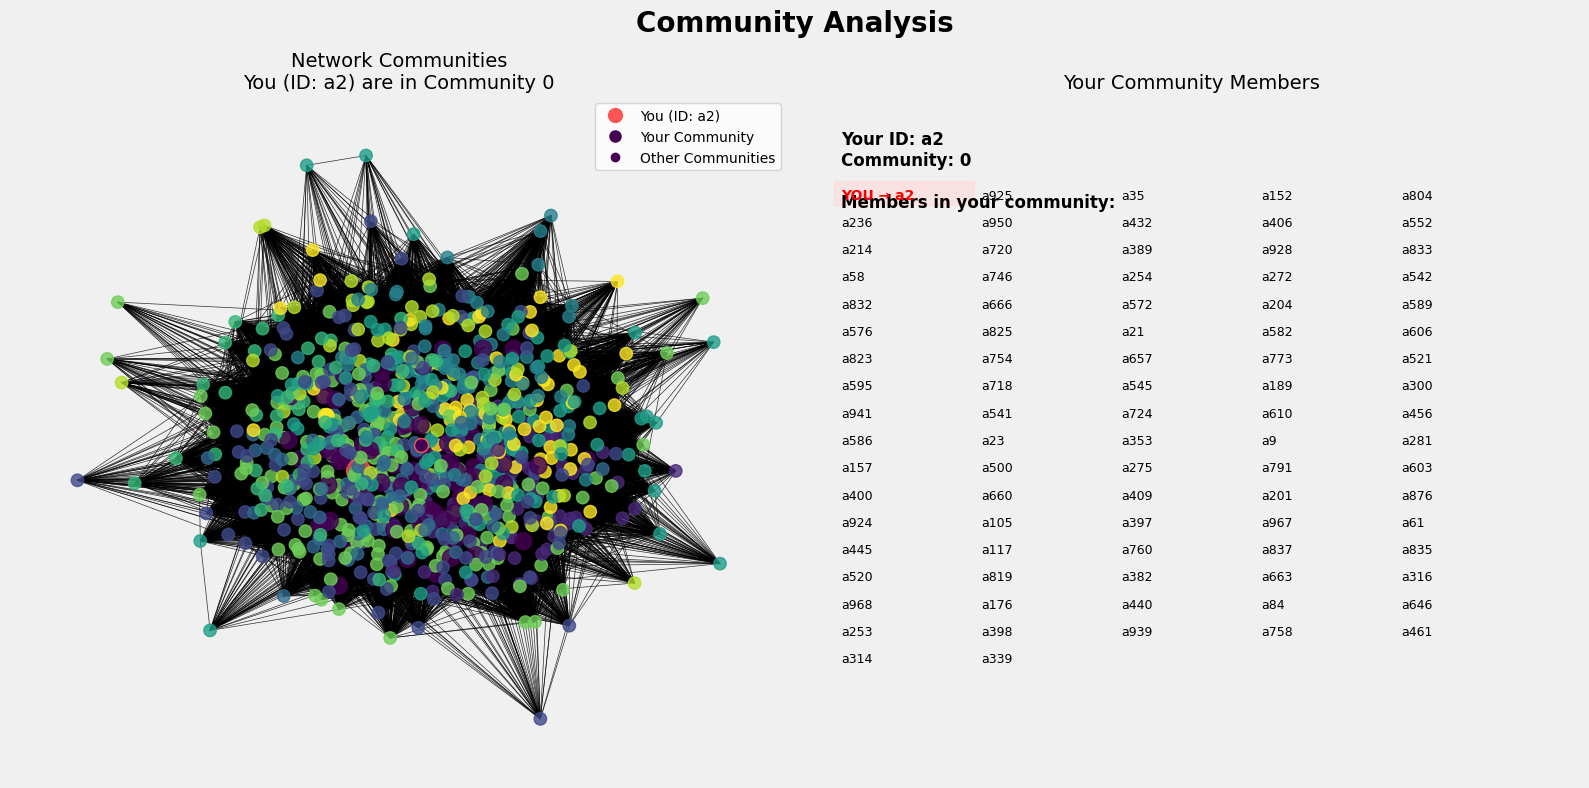

In [18]:
# Compute positions for nodes using a spring layout
pos = nx.spring_layout(G, seed=42)

# Generate a color map based on community membership with more vibrant colors
communities = set(partition.values())
colors = plt.cm.viridis(np.linspace(0, 1, len(communities)))
community_color_map = {com: colors[i] for i, com in enumerate(communities)}

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), facecolor='#f0f0f0')
fig.suptitle("Community Analysis", fontsize=20, fontweight='bold', y=0.98)

# --- Left subplot: Network Graph ---
# Find your_attendee_id's community
your_community = partition.get(your_attendee_id)
your_color = '#ff5555'  # Bright red for your node

# Set node sizes: larger for you, medium for your community, smaller for others
node_sizes = []
node_colors = []

for node in G.nodes():
    if node == your_attendee_id:
        node_sizes.append(300)
        node_colors.append(your_color)
    elif node in blacklist:
        node_sizes.append(150)
        node_colors.append(community_color_map[your_community])
    else:
        node_sizes.append(80)
        node_colors.append(community_color_map[partition.get(node, 0)])

# Draw network with improved aesthetics
nx.draw_networkx(
    G, pos, 
    node_color=node_colors,
    with_labels=False,
    node_size=node_sizes,
    width=0.5,
    alpha=0.8,
    ax=ax1
)

# Add a title with your community info
ax1.set_title(f"Network Communities\nYou (ID: {your_attendee_id}) are in Community {your_community}", fontsize=14)
ax1.axis('off')

# Add a legend
ax1.plot([0], [0], 'o', color=your_color, markersize=10, label=f'You (ID: {your_attendee_id})')
ax1.plot([0], [0], 'o', color=community_color_map[your_community], markersize=8, label='Your Community')
ax1.plot([0], [0], 'o', color=colors[0], markersize=6, label='Other Communities')
ax1.legend(loc='upper right', frameon=True, facecolor='white')

# --- Right subplot: Blacklist ---
ax2.axis('off')
ax2.set_title("Your Community Members", fontsize=14)

# Create a more visually appealing blacklist display
blacklist_text = f"Your ID: {your_attendee_id}\nCommunity: {your_community}\n\nMembers in your community:"
ax2.text(0.05, 0.95, blacklist_text, fontsize=12, verticalalignment='top', fontweight='bold')

# Display blacklist in a grid with highlight for your position
rows = 20
cols = 5
cell_height = 0.8 / rows
cell_width = 0.9 / cols

for i, member in enumerate([your_attendee_id] + blacklist):
    row = i // cols
    col = i % cols
    is_you = (member == your_attendee_id)
    
    if row < rows:  # Only show what fits
        x = 0.05 + col * cell_width
        y = 0.85 - row * cell_height
        
        if is_you:
            rect = plt.Rectangle((x-0.01, y-0.01), cell_width, cell_height*0.9, 
                              fill=True, color='#ffdddd', alpha=0.7, transform=ax2.transAxes)
            ax2.add_patch(rect)
            ax2.text(x, y, f"YOU → {member}", fontsize=10, transform=ax2.transAxes, 
                     color='red', fontweight='bold')
        else:
            ax2.text(x, y, member, fontsize=9, transform=ax2.transAxes)

# Add information about blacklist size
if len(blacklist) > rows * cols - 1:
    ax2.text(0.05, 0.05, f"+ {len(blacklist) - (rows * cols - 1)} more members", 
             fontsize=10, fontweight='bold', transform=ax2.transAxes)

plt.tight_layout()
plt.show()